In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
# Missing values
df.isnull().sum()

Category    0
Message     0
spam        0
dtype: int64

In [8]:
# checking for duplicate values.
df.duplicated().sum()

415

In [9]:
# Remove duplicate.
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(5157, 3)

### EDA

In [12]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
df['spam'].value_counts()

0    4516
1     641
Name: spam, dtype: int64

In [14]:
import matplotlib.pyplot as plt

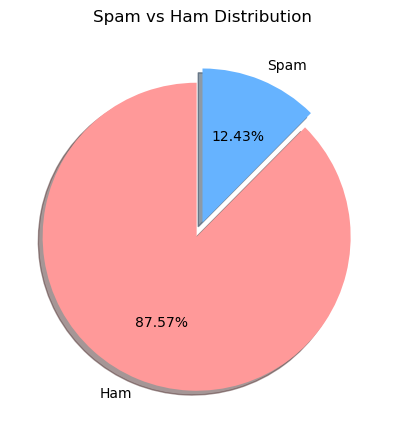

In [15]:
plt.figure(figsize=(5, 5))  
plt.pie(df['spam'].value_counts(),
labels=['Ham','Spam'],      
        autopct='%1.2f%%',  
        startangle=90, 
        colors=['#ff9999','#66b3ff'], 
        explode=(0.1, 0) ,  
        shadow=True)  

plt.title('Spam vs Ham Distribution', fontsize=12)
plt.show()

In [17]:
# Data is imbalanced

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df['Message'].apply(len)

In [21]:
df.head()

,Category,Message,spam,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [22]:
# no. of words

df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Category,Message,spam,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24
1,ham,Ok lar... Joking wif u oni...,0,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,ham,U dun say so early hor... U c already then say...,0,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [23]:
df['num_sent']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Category,Message,spam,num_characters,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [24]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
# For Ham

df[df['spam']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
# For Spam

df[df['spam']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [27]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

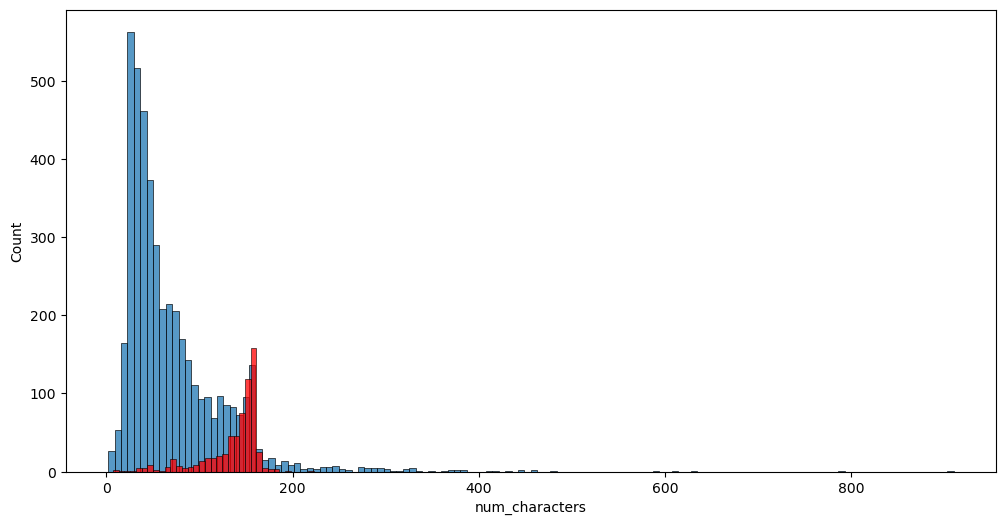

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['num_characters'])
sns.histplot(df[df['spam'] == 1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

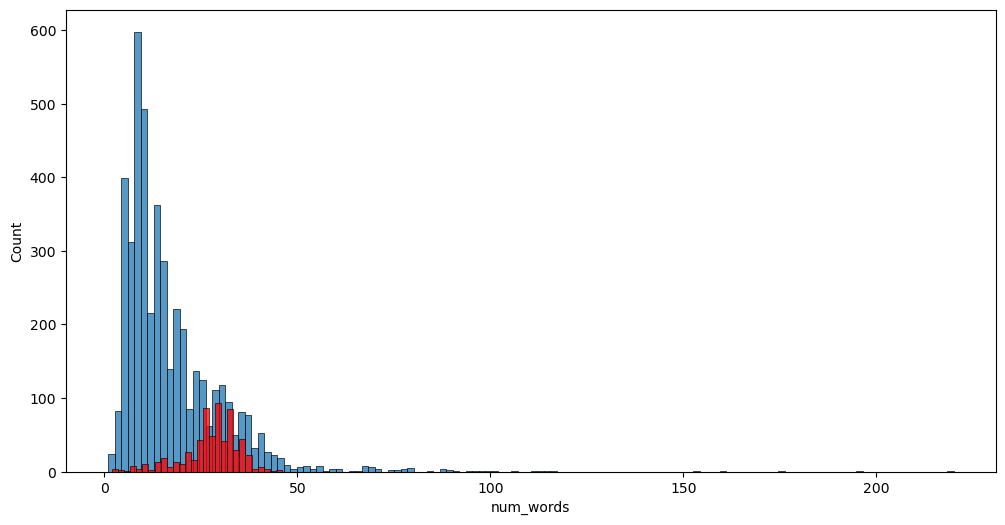

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['num_words'])
sns.histplot(df[df['spam'] == 1]['num_words'], color='red')

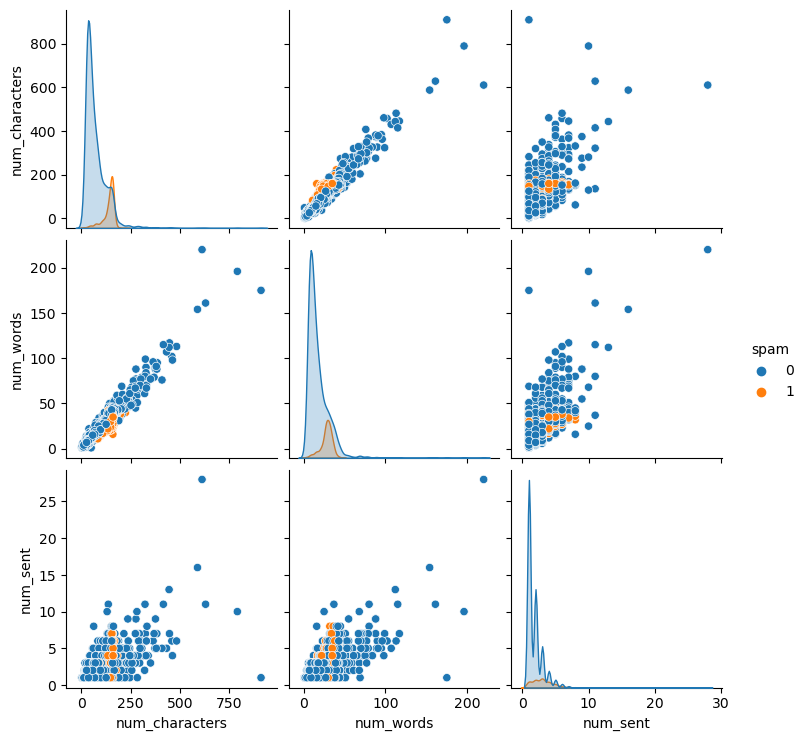

In [30]:
sns.pairplot(df, hue='spam')

<AxesSubplot:>

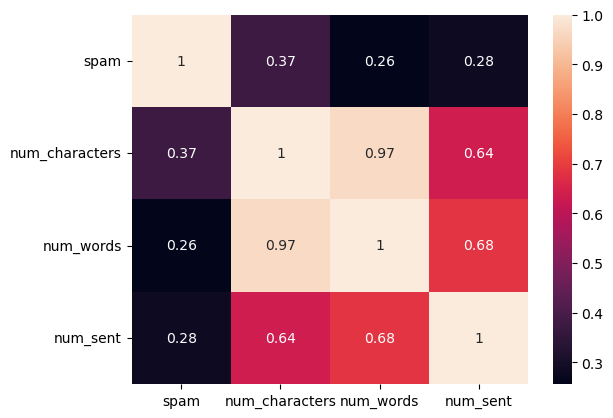

In [31]:
sns.heatmap(df.corr(), annot=True)

## Data/Text preprocessing:

In [32]:
# Lower case
# Tokenization
# Removing special characters
# Removing stop words & punctuation
# Stemming

In [33]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [34]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
     
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
            
    return " ".join(y)

In [36]:
transform_text('Hi How Are You ? &%$ Can we go for coffee!, I love Machine Learning')

'hi go coffe love machin learn'

In [37]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [38]:
df.head()

,Category,Message,spam,num_characters,num_words,num_sent,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [39]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [41]:
spam_wc = wc.generate(df[df['spam'] == 1]['transformed_text'].str.cat(sep=" "))

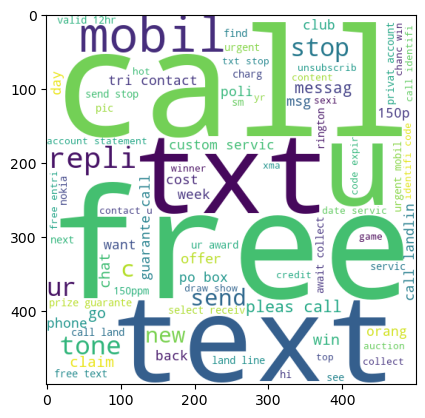

In [42]:
plt.imshow(spam_wc)

In [43]:
ham_wc = wc.generate(df[df['spam'] == 0]['transformed_text'].str.cat(sep=" "))

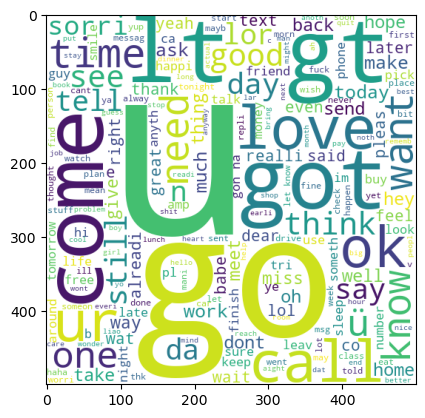

In [44]:
plt.imshow(ham_wc)

### Model Building

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
v = CountVectorizer()
tfidf = TfidfVectorizer()

In [46]:
X = v.fit_transform(df['transformed_text']).toarray()

In [47]:
X.shape

(5157, 6781)

In [48]:
y = df['spam'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [50]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8817829457364341
[[812 107]
 [ 15  98]]
0.47804878048780486


In [53]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9757751937984496
[[900  19]
 [  6 107]]
0.8492063492063492


In [54]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9777131782945736
[[915   4]
 [ 19  94]]
0.9591836734693877


In [55]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()

In [56]:
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9651162790697675
[[897  22]
 [ 14  99]]
0.8181818181818182


In [57]:
from sklearn.svm import SVC
svc = SVC()

In [58]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9854651162790697
[[918   1]
 [ 14  99]]
0.99


## Cross Validation:

In [59]:
from sklearn.model_selection import cross_val_score

### Random Forest validation score

In [60]:
cross_val_score(tree.DecisionTreeClassifier(), X, y , cv = 3)

array([0.96276905, 0.96335079, 0.95287958])

### Naive-Bayes validation score

In [61]:
cross_val_score(GaussianNB(), X, y , cv = 3)

array([0.86969168, 0.87143688, 0.87841768])

In [62]:
cross_val_score(MultinomialNB(), X, y , cv = 3)

array([0.97498546, 0.97324026, 0.97382199])

In [63]:
cross_val_score(BernoulliNB(), X, y , cv = 3)

array([0.96567772, 0.96393252, 0.96567772])

### Support Vector validation score

In [64]:
cross_val_score(SVC(), X, y , cv = 3)

array([0.97091332, 0.96509599, 0.96625945])

### As per the Validation Scores shown above, we can say that Naive-Bayes(MultinomialNB) model is best suited for predicting the Email Spam.